In [1]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



In [3]:
digits = datasets.load_digits()
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

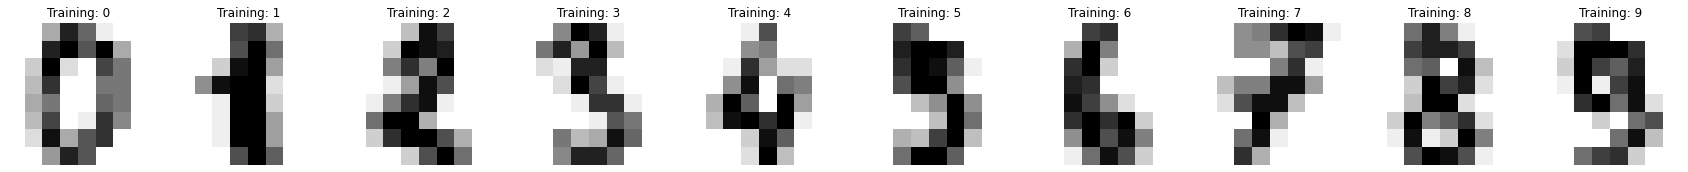

In [4]:

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 6))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [6]:
#rede neural
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', 
                          alpha=1e-5, 
                          hidden_layer_sizes=(1024, 128), 
                          random_state=1, 
                          max_iter=300)

print(mlp_model)


mlp_model.fit(X_train, y_train)  #executa o treinamento no modelo configurado.                  
pred_mlp =  mlp_model.predict(X_test) #executa o teste do modelo

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1024, 128), max_iter=300,
              random_state=1)


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



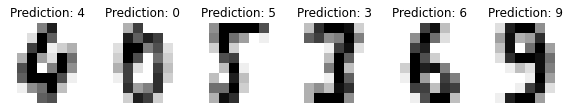

In [7]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [8]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




In [9]:
print(f"Classification report for classifier rede neural {mlp_model}:\n"
      f"{metrics.classification_report(y_test, pred_mlp)}\n")

Classification report for classifier rede neural MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1024, 128), max_iter=300,
              random_state=1):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.92      0.87      0.89        53
           2       1.00      1.00      1.00        53
           3       0.96      0.81      0.88        53
           4       0.98      0.93      0.95        57
           5       0.93      0.98      0.96        56
           6       0.96      0.98      0.97        54
           7       0.98      0.98      0.98        54
           8       0.88      0.96      0.92        52
           9       0.87      0.95      0.90        55

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Resultado da matriz de Confusão do SVM


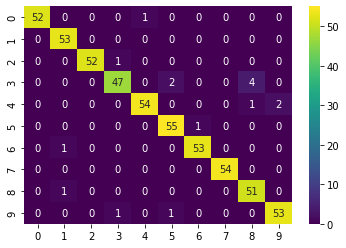

In [10]:
import seaborn as sns #biblitoca para visualização de dados baseada no matplotlib
from sklearn.metrics import confusion_matrix #métricas de classificação
print("Resultado da matriz de Confusão do SVM")
confu_mat = confusion_matrix(y_test, predicted)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

Resultado da matriz de Confusão do Rede Neural


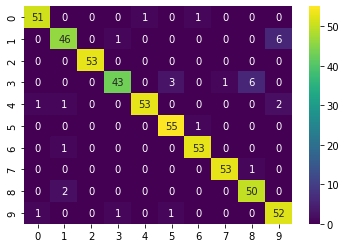

In [11]:
print("Resultado da matriz de Confusão do Rede Neural")
confu_mat = confusion_matrix(y_test, pred_mlp)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')